In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
housing = fetch_california_housing()

In [5]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [6]:
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
X_train.shape

(11610, 8)

In [10]:
model=keras.models.Sequential([keras.layers.Dense(30,activation="relu",input_shape=[8]),
                              keras.layers.Dense(30,activation="relu"),
                              keras.layers.Dense(1)])
# we can also write input_shape=X_train.shape[1:]

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss="mean_squared_error",optimizer=keras.optimizers.SGD(lr=1e-3),metrics=['mae'])

In [13]:
model_history=model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - mae: 0.9900 - val_loss: 0.7126 - val_mae: 0.6368
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6577 - mae: 0.6042 - val_loss: 0.6880 - val_mae: 0.5704
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - mae: 0.5618 - val_loss: 0.5803 - val_mae: 0.5352
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - mae: 0.5398 - val_loss: 0.5166 - val_mae: 0.5207
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - mae: 0.5237 - val_loss: 0.4895 - val_mae: 0.5022
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - mae: 0.5113 - val_loss: 0.4951 - val_mae: 0.4934
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - mae: 0.5010 - val_loss: 0.4861 - val_mae: 0.4838
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [14]:
mae_test=model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3942 - mae: 0.4502


In [15]:
model_history.history

{'loss': [1.8866397142410278,
  0.6577127575874329,
  0.5934185981750488,
  0.5557191967964172,
  0.5271904468536377,
  0.5032975673675537,
  0.48535558581352234,
  0.47091811895370483,
  0.45779934525489807,
  0.4474469721317291,
  0.4393136501312256,
  0.43176087737083435,
  0.4260515868663788,
  0.42017653584480286,
  0.41549986600875854,
  0.4111650586128235,
  0.4077068865299225,
  0.4039528965950012,
  0.4004494547843933,
  0.3979603350162506],
 'mae': [0.9900256991386414,
  0.6041510105133057,
  0.5618006587028503,
  0.5398454070091248,
  0.5237293839454651,
  0.5112562775611877,
  0.5010154247283936,
  0.492448091506958,
  0.4857262969017029,
  0.47973746061325073,
  0.4744163453578949,
  0.4703480303287506,
  0.46740880608558655,
  0.46360209584236145,
  0.461266428232193,
  0.4591343402862549,
  0.4568699896335602,
  0.45453646779060364,
  0.4521065056324005,
  0.45083147287368774],
 'val_loss': [0.7126054167747498,
  0.6880087852478027,
  0.5803284645080566,
  0.516608536243

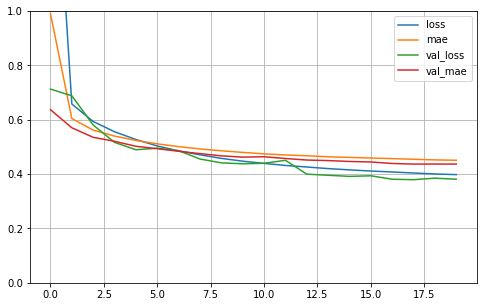

In [16]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [17]:
X_new=X_test[:3]

In [18]:
y_pred=model.predict(X_new)
print(y_pred)
print(y_test[:3])

[[0.5328768]
 [1.8915398]
 [3.404087 ]]
[0.477   0.458   5.00001]


In [19]:
del model

In [21]:
keras.backend.clear_session()

## Functional API
(Wide and Deep neural network)

In [23]:
input_ =keras.layers.Input(shape=X_train.shape[1:])
hidden1=keras.layers.Dense(30,activation='relu')(input_)
hidden2=keras.layers.Dense(30,activation='relu')(hidden1)
concat=keras.layers.concatenate([input_,hidden2])
output=keras.layers.Dense(1)(concat)
model=keras.models.Model(inputs=[input_],outputs=[output])

In [24]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_2[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_2[0][0]                    
                                                                 dense_1[0][0]         

In [25]:
model.compile(loss="mean_squared_error",optimizer=keras.optimizers.SGD(lr=1e-3),metrics=['mae'])

In [26]:
model_history=model.fit(X_train,y_train,epochs=40,validation_data=(X_valid,y_valid))

Epoch 1/40
363/363 [==============================] - 1s 2ms/step - loss: 1.6920 - mae: 0.8893 - val_loss: 0.8798 - val_mae: 0.6026
Epoch 2/40
363/363 [==============================] - 1s 1ms/step - loss: 0.6836 - mae: 0.5994 - val_loss: 0.6420 - val_mae: 0.5764
Epoch 3/40
363/363 [==============================] - 1s 1ms/step - loss: 0.6265 - mae: 0.5775 - val_loss: 0.5891 - val_mae: 0.5503
Epoch 4/40
363/363 [==============================] - 1s 2ms/step - loss: 0.5877 - mae: 0.5581 - val_loss: 0.5455 - val_mae: 0.5343
Epoch 5/40
363/363 [==============================] - 1s 1ms/step - loss: 0.5566 - mae: 0.5421 - val_loss: 0.5409 - val_mae: 0.5202
Epoch 6/40
363/363 [==============================] - 1s 2ms/step - loss: 0.5312 - mae: 0.5298 - val_loss: 0.4903 - val_mae: 0.5046
Epoch 7/40
363/363 [==============================] - 1s 1ms/step - loss: 0.5108 - mae: 0.5186 - val_loss: 0.4728 - val_mae: 0.4962
Epoch 8/40
363/363 [==============================] - 1s 1ms/step - loss: 0.

In [27]:
mae_test=model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3685 - mae: 0.4314


In [29]:
mae_test

[0.3684528172016144, 0.431399941444397]

In [30]:
model_history.history

{'loss': [1.6920058727264404,
  0.6836402416229248,
  0.626488208770752,
  0.5877465605735779,
  0.5565561056137085,
  0.5311981439590454,
  0.5107864141464233,
  0.4951668083667755,
  0.48022276163101196,
  0.4684668779373169,
  0.4589638411998749,
  0.4502205550670624,
  0.4432658851146698,
  0.43632543087005615,
  0.4306245744228363,
  0.4253448247909546,
  0.42129331827163696,
  0.4168177843093872,
  0.4126453101634979,
  0.40958571434020996,
  0.4059634208679199,
  0.40294399857521057,
  0.4000455439090729,
  0.3971884846687317,
  0.3946215510368347,
  0.3924905061721802,
  0.3904934525489807,
  0.38845309615135193,
  0.38671210408210754,
  0.38484567403793335,
  0.382953941822052,
  0.3815852701663971,
  0.3805288076400757,
  0.37870272994041443,
  0.3775632083415985,
  0.3763015866279602,
  0.37508344650268555,
  0.37408941984176636,
  0.3728184998035431,
  0.37164586782455444],
 'mae': [0.8892966508865356,
  0.5993583798408508,
  0.577479362487793,
  0.5581423044204712,
  0.542

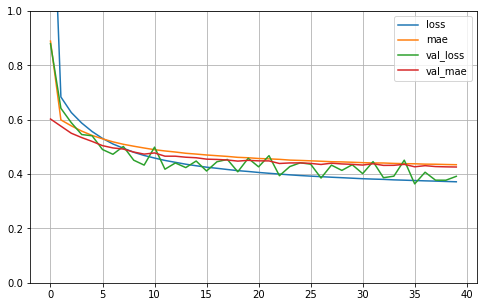

In [31]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [32]:
model_history=model.fit(X_train,y_train,epochs=40,validation_data=(X_valid,y_valid))

Epoch 1/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3709 - mae: 0.4335 - val_loss: 0.3834 - val_mae: 0.4255
Epoch 2/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3701 - mae: 0.4326 - val_loss: 0.4377 - val_mae: 0.4316
Epoch 3/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3692 - mae: 0.4328 - val_loss: 0.4013 - val_mae: 0.4263
Epoch 4/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3680 - mae: 0.4315 - val_loss: 0.3788 - val_mae: 0.4270
Epoch 5/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3676 - mae: 0.4310 - val_loss: 0.3719 - val_mae: 0.4246
Epoch 6/40
363/363 [==============================] - 1s 1ms/step - loss: 0.3663 - mae: 0.4304 - val_loss: 0.3966 - val_mae: 0.4245
Epoch 7/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3659 - mae: 0.4297 - val_loss: 0.3727 - val_mae: 0.4236
Epoch 8/40
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [33]:
mae_test=model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3453 - mae: 0.4138


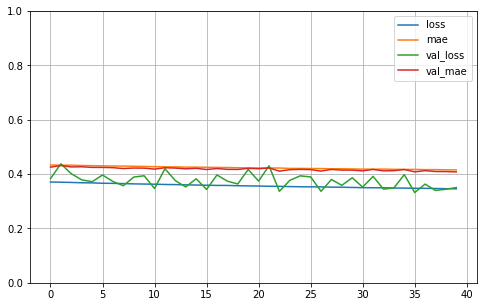

In [34]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## saving and restoring 

In [35]:
model.save("my_func_model.h5")

In [38]:
del model

NameError: name 'model' is not defined

In [39]:
keras.backend.clear_session()

In [40]:
modelR=keras.models.load_model("my_func_model.h5")

In [42]:
modelR.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_2[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_2[0][0]                    
                                                                 dense_1[0][0]         

In [44]:
y_pred=modelR.predict(X_new)
print(y_pred)

[[0.71027946]
 [1.6731737 ]
 [4.1621943 ]]


In [45]:
del modelR
keras.backend.clear_session()

## Using Callbacks during training

In [46]:
np.random.seed(42)
tf.random.set_seed(42)

In [48]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=[8]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)
])

In [49]:
model.compile(loss="mse",optimizer=keras.optimizers.SGD(lr=1e-3))

In [50]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("Model.{epoch:02d}.h5")

In [51]:
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid),callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4474 - val_loss: 0.4379

In [52]:
del model
keras.backend.clear_session()

In [54]:
model=keras.models.load_model("Model.10.h5")

In [55]:
mse_test=model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4382


## saving best model only

In [56]:
del model
keras.backend.clear_session()

In [57]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=[8]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)
])

In [58]:
model.compile(loss="mse",optimizer=keras.optimizers.SGD(lr=1e-3))

In [59]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("Best_Model.h5",save_best_only=True)

In [60]:
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid),callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.4581 - val_loss: 0.7883
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7368 - val_loss: 0.7306
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6516 - val_loss: 0.6501
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5951 - val_loss: 0.5551
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5536 - val_loss: 0.5025
Epoch 6/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5199 - val_loss: 0.4728
Epoch 7/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4940 - val_loss: 0.4497
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4730 - val_loss: 0.4359
Epoch 9/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4563 - val_loss: 0.4267
Epoch 10/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4431 - val_loss: 0.4224

In [61]:
model=keras.models.load_model("Best_Model.h5")
mse_test=model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4366


## Best model only 

In [62]:
del model
keras.backend.clear_session()

In [63]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=[8]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)
])

In [64]:
model.compile(loss="mse",optimizer=keras.optimizers.SGD(lr=1e-3))

In [65]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("early_stop_model.h5",save_best_only=True)

In [66]:
early_stopping_cb=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
# patience is number of epochs with no improvement after which training will be stopped

In [67]:
history=model.fit(X_train,y_train,epochs=200,validation_data=(X_valid,y_valid),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/200
363/363 [==============================] - 1s 2ms/step - loss: 2.5780 - val_loss: 2.2266
Epoch 2/200
363/363 [==============================] - 1s 1ms/step - loss: 1.0896 - val_loss: 0.9287
Epoch 3/200
363/363 [==============================] - 1s 2ms/step - loss: 0.8430 - val_loss: 0.9400
Epoch 4/200
363/363 [==============================] - 1s 2ms/step - loss: 0.7673 - val_loss: 0.7490
Epoch 5/200
363/363 [==============================] - 1s 2ms/step - loss: 0.7194 - val_loss: 0.6682
Epoch 6/200
363/363 [==============================] - 1s 1ms/step - loss: 0.6799 - val_loss: 0.6534
Epoch 7/200
363/363 [==============================] - 1s 2ms/step - loss: 0.6466 - val_loss: 0.6407
Epoch 8/200
363/363 [==============================] - 1s 1ms/step - loss: 0.6173 - val_loss: 0.5704
Epoch 9/200
363/363 [==============================] - 1s 1ms/step - loss: 0.5894 - val_loss: 0.5552
Epoch 10/200
363/363 [==============================] - 1s 1ms/step - loss: 0.5645 - val_lo

In [68]:
model=keras.models.load_model("early_stop_model.h5")
mse_test=model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3481
